## Ising Problem Simple Neural Network

### Import

In [79]:
from __future__ import division
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from numpy.random import rand
import random


import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from skimage.measure import block_reduce


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow as tf

import time
import datetime

# filename_low_64 = "/content/drive/My Drive/02_Grad School/G1/Spring/Inverse Problems/HW/HW2/PS2-a-lowT"
# filename_high_64 = "/content/drive/My Drive/02_Grad School/G1/Spring/Inverse Problems/HW/HW2/PS2-a-highT"

# filename_low_32 = "/content/drive/My Drive/02_Grad School/G1/Spring/Inverse Problems/HW/HW2/PS2-d-lowT"
# filename_high_32 = "/content/drive/My Drive/02_Grad School/G1/Spring/Inverse Problems/HW/HW2/PS2-d-highT"

# kraggle_SVM_data = "/content/drive/My Drive/02_Grad School/G1/Spring/Inverse Problems/HW/HW2/hw2p1a_testset.csv"
# kraggle_SVM_label = "/content/drive/My Drive/02_Grad School/G1/Spring/Inverse Problems/HW/HW2/hw2p1a_sample_int.csv"

filename_low_64 = "PS2-a-lowT"
filename_high_64 = "PS2-a-highT"

filename_low_32 = "PS2-d-lowT"
filename_high_32 = "PS2-d-highT"

# kraggle_SVM_data = "hw2p1a_testset.csv"

# kraggle_CNN_data = "hw2p1b_testset.csv"

# from google.colab import drive
# drive.mount('/content/drive')
#https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q

### Import  64x64 Data

In [4]:
#Import the relevent images into python
high_t_64 = []
for i in range(500):
    high_t_64.append(np.loadtxt((filename_high_64+'/PS2-a-highT/')+str(i).zfill(3), delimiter=','))


In [5]:
#Import the relevent images into python
low_t_64 = []
for i in range(500):
    low_t_64.append(np.loadtxt((filename_low_64+'/PS2-a-lowT/')+str(i).zfill(3), delimiter=','))

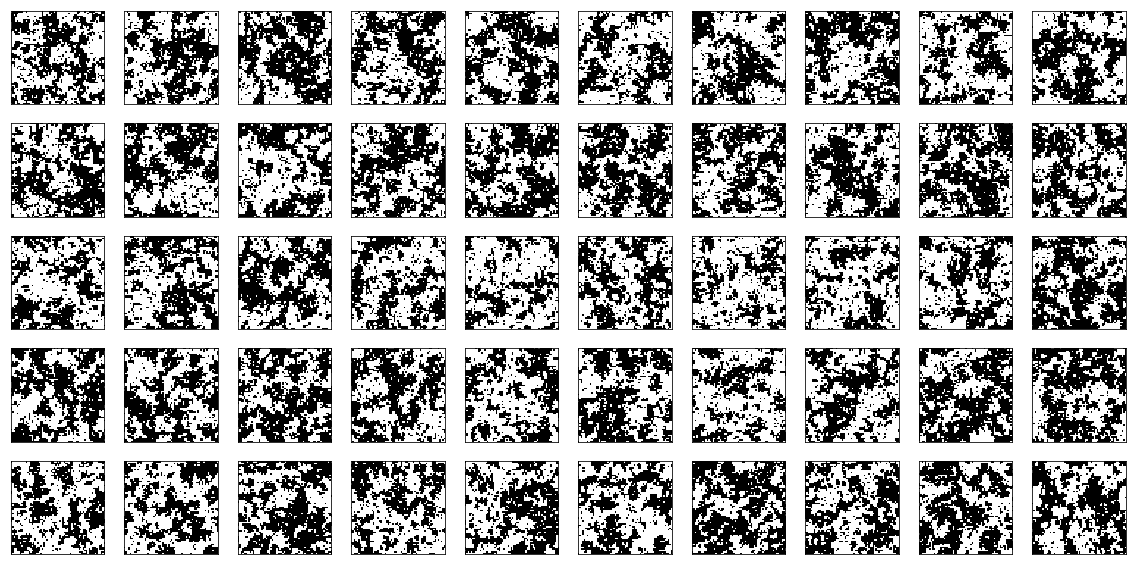

In [6]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(high_t_64[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

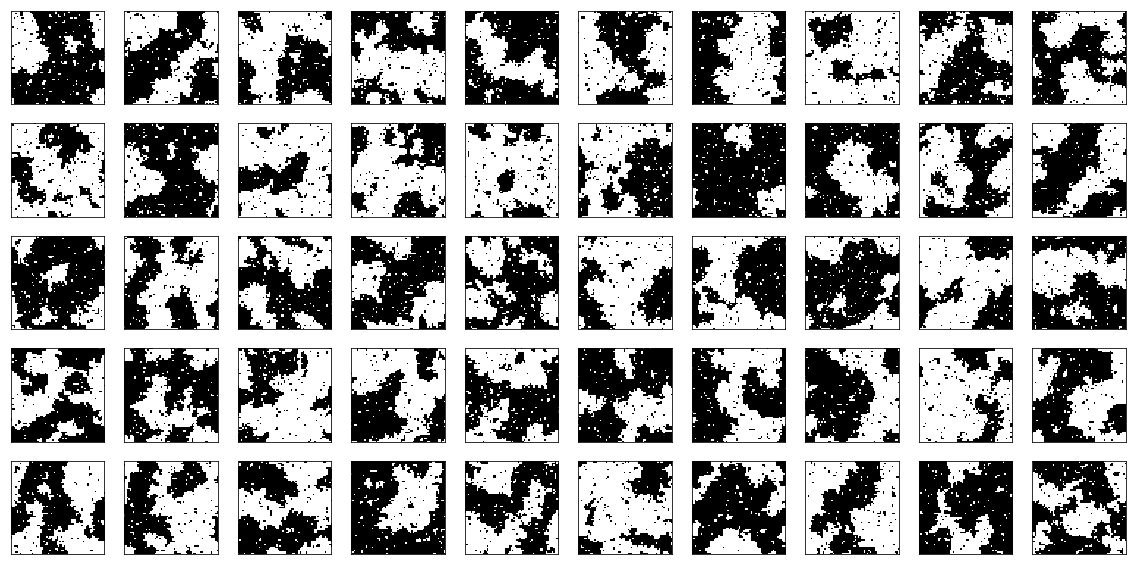

In [7]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(low_t_64[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

In [8]:
#Combine the two data-sets into a single array
data_img_64 = np.concatenate((high_t_64,low_t_64))

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data_img_64 = data_img_64.reshape((-1, 64*64))

#Provide a set of labels which match the images (1 for high, and 0 for low)
data_label_64 = np.concatenate((np.ones(len(high_t_64)), np.zeros(len(low_t_64))))

#Randomize the data and labels in the same manner, so that I can easily create train and test sets
data_img_64, data_label_64 = shuffle(data_img_64, data_label_64, random_state = 0)

### Train and Test Model


To give you a preview of the power which neural networks (NN) hold, we create a very simple NN to categorize our ising images.


In [9]:
#https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
#https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
# Train a model using the test set
n_train = 750
batch_size = 128
num_classes = 2
epochs = 50

img_rows, img_cols = 64, 64

x_train = data_img_64[:n_train]
y_train = data_label_64[:n_train]

x_test = data_img_64[n_train:]
y_test = data_label_64[n_train:]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Because our data is already between 0 and 1, we have no need to rescale it
#(As we would for a color or greyscale image)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (750, 64, 64, 1)
750 train samples
250 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Test loss: 1.4699728517532349
Test accuracy: 0.4880000054836273


In [ ]:
## My solution
n_sample = 5
high_rand_vec = random.sample(range(0,len(high_t_64)),n_sample)
low_rand_vec = random.sample(range(0,len(low_t_64)),n_sample)
high_img_var_samp = 

363.0


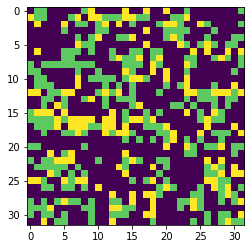

In [49]:

test = high_t_64[4]
block_test = block_reduce(test, block_size=(2,2), func=np.var)
plt.imshow(block_test)
print(np.sum(block_test))

180.25


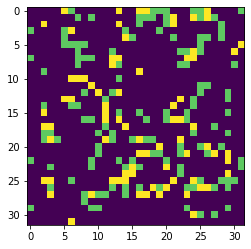

In [48]:
test_2 = low_t_64[5]
block_test_2 = block_reduce(test_2, block_size=(2,2), func=np.var)
plt.imshow(block_test_2)
print(np.sum(block_test_2))

### Kaggel

#### Import Test 64x64 Data

In [ ]:
#Import the relevent images into python
#t_data = np.genfromtxt(kaggle_CNN_data, delimiter = ',')
#t_data.shape

In [ ]:
#Plot an array of some of the images, to try and better see what is going on.
#fig,ax = plt.subplots(5,10,figsize=(20,10))
#for i in range(50):
#    ax[i//10,i%10].matshow(np.reshape(t_data[i], (-1, 64)),cmap=plt.cm.binary)
#    ax[i//10,i%10].set_xticks(())
#    ax[i//10,i%10].set_yticks(())

#### Test Data

Now, I can test my model on the data provided via Kraggle

In [80]:
class Ising():
    ''' Simulating the Ising model '''  
    def __init__(self, size, temp):
        self.temp = temp
        self.N = int(size)
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N) # select a row
                    b = np.random.randint(0, N) # select a column
                    s =  config[a, b] # current state at (a, b)
                    # periodic boundary condition imposed
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        config = 2*np.random.randint(2, size=(self.N,self.N))-1   
        times = 100
        for i in range(times):
            self.mcmove(config, self.N, 1.0/self.temp)
        return config

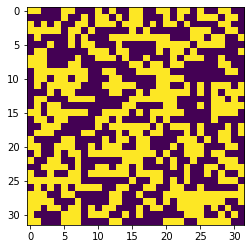

In [87]:
temps_vec = np.linspace(0,10,num=50)

sim_data = []
for temp in temps_vec:
    

In [75]:
#Import the high images into python
high_t_32 = []
for i in range(500):
    high_t_32.append(np.loadtxt((filename_high_32+'/PS2-d-highT/')+str(i).zfill(3), delimiter=','))
    
#Import the low images into python
low_t_32 = []
for i in range(500):
    low_t_32.append(np.loadtxt((filename_low_32+'/PS2-d-lowT/')+str(i).zfill(3), delimiter=','))

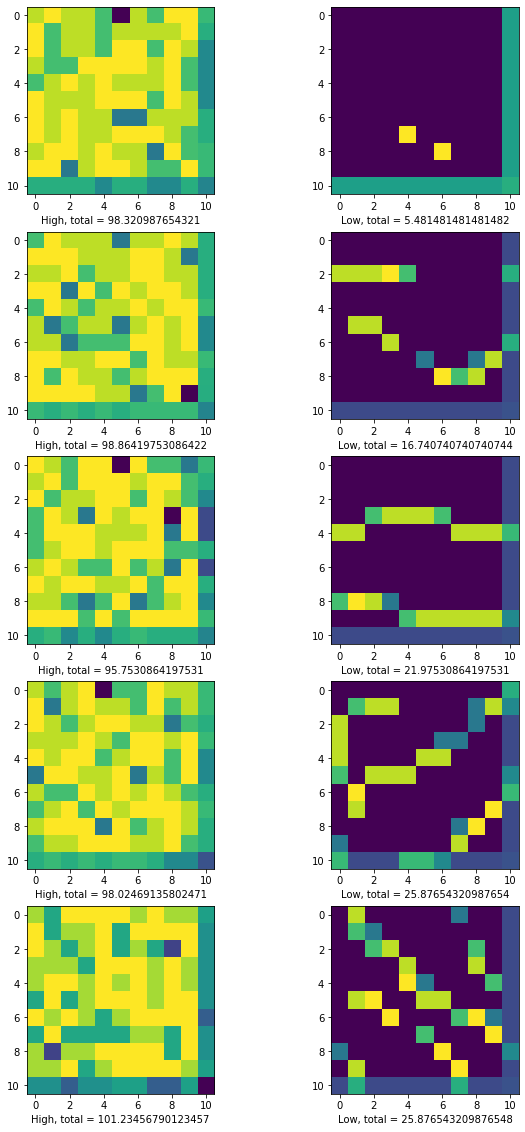

In [73]:
## My solution
def loc_var(img):
    loc_var_img = block_reduce(img, block_size=(3,3), func=np.var)
    return loc_var_img
    
n_sample = 5
high_rand_vec = random.sample(range(0,len(high_t_32)),n_sample)
low_rand_vec = random.sample(range(0,len(low_t_32)),n_sample)
high_img_var_sample = [loc_var(high_t_32[i]) for i in high_rand_vec]
low_img_var_sample = [loc_var(low_t_32[i]) for i in low_rand_vec]

fig,ax = plt.subplots(n_sample, 2,figsize=(10,4*n_sample))
for i in range(n_sample):
    ax[i,0].imshow(high_img_var_sample[i])
    ax[i,0].set_xlabel("High, total = " + str(np.sum(high_img_var_sample[i])))
    ax[i,1].imshow(low_img_var_sample[i])
    ax[i,1].set_xlabel("Low, total = " + str(np.sum(low_img_var_sample[i])))

In [53]:
len(high_t_32)

0

In [ ]:
# Train a model using the test set
#Test model on remaining data
img_rows, img_cols = 64, 64

if K.image_data_format() == 'channels_first':
    t_data = t_data.reshape(t_data.shape[0], 1, img_rows, img_cols)
else:
    t_data = t_data.reshape(t_data.shape[0], img_rows, img_cols, 1)

t_data = t_data.astype('float32')


predicted = np.around(model.predict(t_data),0)
predicted = predicted.astype(int)
csv = np.vstack((np.arange(0,200),predicted[:,1])).T
np.savetxt("foo1.csv", csv, fmt='%10.5f', delimiter=",")